# Partial Dependence Plot (PDP)

Partial dependence plots belong to the class of global model-agnostic methods. They show the marginal effect of one or two features on the model prediction. 

For a given index set $S$ (usually with one or two elements), one would like to estimate the marginal effect the features in $S$ have on the output of the model $f$, i.e. we plot the lower dimensional function $f_S$ defined by 
$$
f_S(x_S) := \int f(x_S,x_{-S})dP(x_{-S}).
$$
Given $n$ datapoints $x^i$, this integral may be approximated by a Monte Carlo approach:
$$
f_S(x_S) \approx\frac{1}{n}\sum_i \int f(x_S,x^i_{-S})
$$

The method can be summarised as follows:
1) Select feature
2) Define grid
3) Per grid value  
    a) Replace feature with grid value  
    b) average predictions
4) Draw curve

<div class="alert alert-block alert-info"> <b>NOTE:</b> An implicit assumption of the method is that the features in $S$ and the complement are not correlated. Otherwise, we may integrate over datapoints that are unreasonable which may distort the results. </div>

This notebook demonstrates the usage of the sloth.PDP class to generate such plots and discusses the problem of correlated features.

**Literature**

Friedman, Jerome H. “Greedy function approximation: A gradient boosting ma- chine.” Annals of statistics (2001)

In [ ]:
import numpy as np
import sys
import seaborn as sn
import config
import matplotlib.pyplot as plt
import sloth


import logging
logging.basicConfig()
logger = logging.getLogger('sloth')
logger.setLevel(level=logging.DEBUG)

sn.set_style("whitegrid")
#sn.set_theme()

%matplotlib inline
%load_ext autoreload
%autoreload 2

## 1D Plots

### Simple Plotting

In [3]:
# get a sample validation task from a synthetic credit default model
validation_task = sloth.datasets.credit_default.get(0,0)

In [3]:
#generate an object of the PDP class
pdp = sloth.explainers.global_explainers.PDP(validation_task, n_steps=50)
pdp_explanation = pdp.explain()

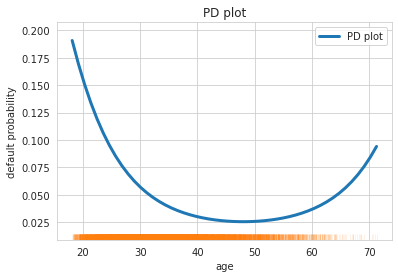

In [4]:
# We can now plot the partial dependents of the features. Here, one can specify a list of features to 
# restrict the plotting to these features only, or all ordinal features will be plotted.
pdp_explanation.plot(features='age') # PDP for feature age only

### Dependency on Data Distribution

Reconsider the integral definition of the PDP 
$$
f_S(x_S) := \int f(x_S,x_{-S})dP(x_{-S})
$$
that is the marginal expectation over the data. This implies that we may get different plots for the same model when the distribution of the input data changes. In addition, since we approximate the continuous integral by averagig over the data points (Monte Carlo), the resulting approximation may distort the results further.

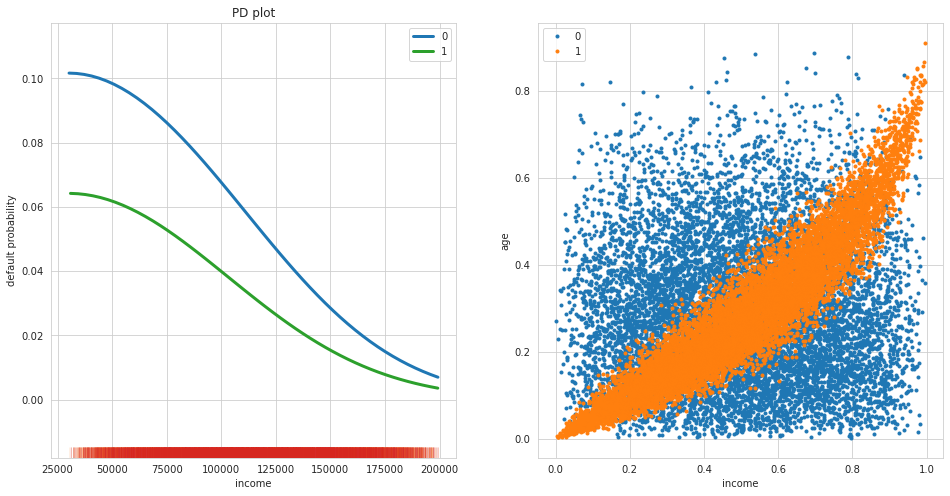

In [5]:
validation_tasks = {str(i): sloth.datasets.credit_default.get(i,0) for i in [0,4,6]}# the two validation tasks have the same model but different data distributions
feature = 'income'
feature2 = 'age'
plt.figure(figsize=(16,8))
for k,v in validation_tasks.items():
    plt.subplot(1,2,1)
    pdp = sloth.explainers.global_explainers.PDP(v, n_steps=50)
    pdp_explanation = pdp.explain()
    pdp_explanation.plot(features=feature, label=k)
    plt.subplot(1,2,2)
    plt.plot(v.data[:,v.input_features[feature].column], v.data[:,v.input_features[feature2].column], '.', label=k)
    plt.legend()
    plt.xlabel(feature)
    plt.ylabel(feature2)

### Correlated Features

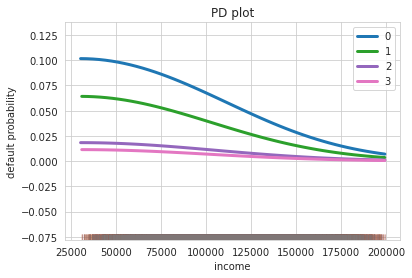

In [6]:
# we generate a second validation task with a different correlation structure between the features 
validation_tasks = {str(i): sloth.datasets.credit_default.get(i,0) for i in range(4)}
for k,v in validation_tasks.items():
    pdp = sloth.explainers.global_explainers.PDP(v, n_steps=50)
    pdp_explanation = pdp.explain()
    pdp_explanation.plot(features='income',label=k)

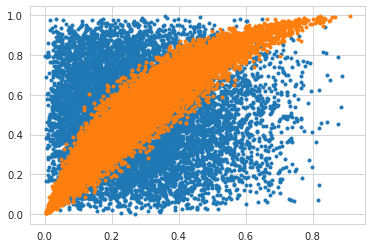

In [7]:
for i in range(2):
    plt.plot(validation_tasks[str(i)].data[:,0], validation_tasks[str(i)].data[:,1],'.')

## Categorical Features

In [8]:
validation_task = sloth.datasets.credit_default.get(dataset=2, model=0)
pdp = sloth.explainers.global_explainers.PDP(validation_task, n_steps=50)
pdp_explanation = pdp.explain()
pdp_explanation.plot(features='zip_code')

NotImplementedError: Plotting up to now only implemented for ordinal features.

## 2D Plots

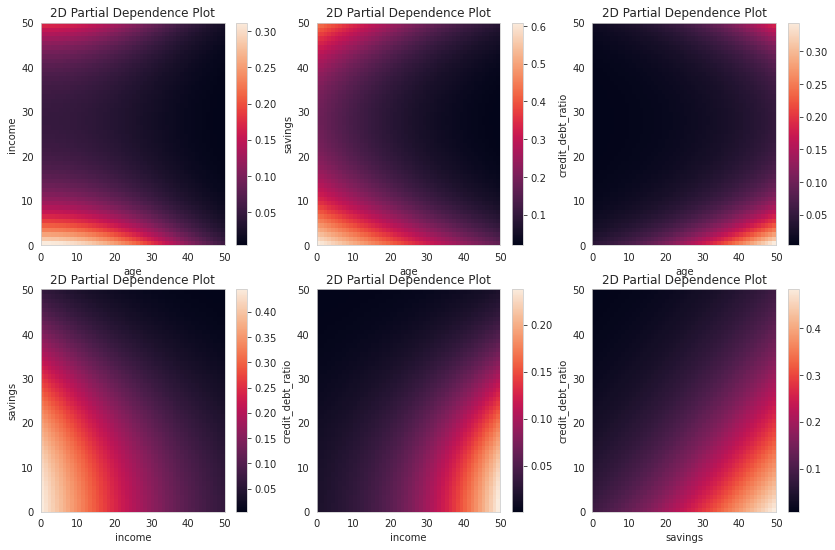

In [9]:
# get a sample validation task from a synthetic credit default model
validation_task = sloth.datasets.credit_default.get(0,0)
#generate an object of the PDP class
pdp2D = sloth.PDP2D(validation_task, n_steps=50)
pdp2D_explanation = pdp2D.explain()
plt.figure(figsize=(14,9))
pdp2D_explanation.plot(n_subplot_cols=3)